# Chargement des modules

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# Données

## Source des données

L'adresse internet à laquelle j'ai trouvé ma table de données est la suivante:
https://www.kaggle.com/jolasa/waves-measuring-buoys-data-mooloolaba

## Chargement des données

In [ ]:
df=pd.read_csv('data/Coastal Data System - Waves (Mooloolaba) 01-2017 to 06 - 2019.csv')

# Première analyse

## Affichage de lignes du DataFrame

In [ ]:
df.head()

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,01/01/2017 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45


Les dernières lignes :

In [ ]:
df.tail()

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
43723,30/06/2019 21:30,2.299,3.60,9.281,12.765,94.0,21.95
43724,30/06/2019 22:00,2.075,3.04,9.303,12.722,95.0,21.95
43725,30/06/2019 22:30,2.157,3.43,9.168,12.890,97.0,21.95
43726,30/06/2019 23:00,2.087,2.84,8.706,10.963,92.0,21.95
43727,30/06/2019 23:30,1.926,2.98,8.509,12.228,84.0,21.95


Ainsi que des lignes prises au hasard :

In [ ]:
df.sample(5)

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
26441,07/05/2018 20:30,1.835,3.55,6.487,9.127,94.0,20.55
18025,01/11/2018 12:30,0.785,1.32,5.230,6.844,98.0,28.35
36565,01/02/2019 18:30,1.284,2.93,4.886,8.113,97.0,27.35
12149,09/11/2017 02:30,0.966,1.50,7.043,11.384,123.0,20.90
41166,08/05/2019 15:00,0.923,1.35,8.139,11.469,109.0,24.25


## Caractéristiques des colonnes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43728 entries, 0 to 43727
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date/Time       43728 non-null  object 
 1   Hs              43728 non-null  float64
 2   Hmax            43728 non-null  float64
 3   Tz              43728 non-null  float64
 4   Tp              43728 non-null  float64
 5   Peak Direction  43728 non-null  float64
 6   SST             43728 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.3+ MB


# Nettoyage et traitement des données

In [ ]:
def nettoyage(val):
    if val<0:
        return np.nan
    else:
        return val
# Cela n'a aucun sens physique qu'il y ait des valeurs négatives pour toutes les colonnes du dataframe
# y compris la température (SST) en Australie à Mooloolaba l'eau descend jamais en dessous de 12°C

df["Hs"]=df["Hs"].apply(nettoyage)
df["Hmax"]=df["Hmax"].apply(nettoyage)
df["Tz"]=df["Tz"].apply(nettoyage)
df["Tp"]=df["Tp"].apply(nettoyage)
df["Peak Direction"]=df["Peak Direction"].apply(nettoyage)
df["SST"]=df["SST"].apply(nettoyage)

In [ ]:
# # convertir Date/Time en objet temporelle datetime lisible par python

for elem in ['Date/Time']:
    df[elem] = pd.to_datetime(df[elem])
df.set_index("Date/Time")

# mettre le nom des mois par mapping

dict_month={1:"Janvier", 2:"Février", 3:"Mars", 4:"Avril", 5:"Mai", 6:"Juin", 7:"Juillet", 8:"Août", 9:"Septembre", 
            10:"Octobre", 
            11:"Novembre", 12:"Decembre"}

df['nom_mois'] = df['Date/Time'].dt.month.map(dict_month)
df.tail(5)

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST,nom_mois
43723,2019-06-30 21:30:00,2.299,3.60,9.281,12.765,94.0,21.95,Juin
43724,2019-06-30 22:00:00,2.075,3.04,9.303,12.722,95.0,21.95,Juin
43725,2019-06-30 22:30:00,2.157,3.43,9.168,12.890,97.0,21.95,Juin
43726,2019-06-30 23:00:00,2.087,2.84,8.706,10.963,92.0,21.95,Juin
43727,2019-06-30 23:30:00,1.926,2.98,8.509,12.228,84.0,21.95,Juin


In [10]:
#indication sur la hauteur maximale des vagues:

def indic(val):
    
    if val<=1.5:
         return "0-Très petite"
        
    elif 1.5<val<=2.5:
        return "1-Petite"
    
    elif 2.5<val<=4:
            return "2-Moyenne"
        
    elif 4<val<=6:
            return "3-Grosse"
    elif val>6:
        return "4-Très Grosse"
    else:
        return None



df["Hmax_indic"]=df["Hmax"].apply(indic)

df.sample(5)

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST,nom_mois,Hmax_indic
5068,2017-04-16 14:00:00,1.485,2.73,8.939,13.170,83.0,24.20,Avril,2-Moyenne
15493,2017-11-19 18:30:00,1.634,2.76,5.591,8.094,99.0,24.05,Novembre,2-Moyenne
11768,2017-09-03 04:00:00,0.697,1.11,6.417,11.444,115.0,21.45,Septembre,0-Très petite
1919,2017-02-09 23:30:00,1.829,2.97,6.889,9.503,83.0,27.20,Février,2-Moyenne
22526,2018-04-15 07:00:00,0.936,1.56,5.191,7.640,49.0,25.20,Avril,1-Petite


In [11]:
# On supprime les donnée de 2019 car elles sont incomplètes: elles ne s'arrêtent seulement en juin,
# cela risque de fausser nos résultats

df = df[df["Date/Time"].dt.year != 2019]
df.tail(10)

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST,nom_mois,Hmax_indic
35030,2018-12-31 19:00:00,1.482,2.67,6.152,9.050,71.0,25.70,Decembre,2-Moyenne
35031,2018-12-31 19:30:00,1.361,2.44,5.917,9.165,64.0,25.70,Decembre,1-Petite
35032,2018-12-31 20:00:00,1.493,2.28,5.972,8.254,61.0,25.70,Decembre,1-Petite
35033,2018-12-31 20:30:00,1.492,2.17,6.271,9.271,66.0,25.65,Decembre,1-Petite
35034,2018-12-31 21:00:00,1.544,2.49,6.024,8.892,67.0,25.65,Decembre,1-Petite
35035,2018-12-31 21:30:00,1.389,2.09,6.028,8.990,75.0,25.65,Decembre,1-Petite
35036,2018-12-31 22:00:00,1.460,2.55,5.913,8.573,68.0,25.65,Decembre,2-Moyenne
35037,2018-12-31 22:30:00,1.495,2.79,5.794,8.829,61.0,25.60,Decembre,2-Moyenne
35038,2018-12-31 23:00:00,1.379,2.26,5.901,8.643,70.0,25.60,Decembre,1-Petite
35039,2018-12-31 23:30:00,1.460,2.49,6.041,8.536,74.0,25.55,Decembre,1-Petite


# Analyse approfondie

## Analyse des statistiques descriptives

In [ ]:

df.describe()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
count,34976.000000,34976.000000,34976.000000,34976.000000,34804.000000,34810.000000
mean,1.211069,2.046857,5.600160,9.026466,99.749799,23.706905
std,0.520279,0.885331,0.959724,2.484827,25.577303,2.229231
min,0.294000,0.510000,3.076000,2.720000,5.000000,19.800000
25%,0.821000,1.380000,4.934000,7.254000,87.000000,21.700000
50%,1.100000,1.850000,5.500000,8.899000,102.000000,23.650000
75%,1.500000,2.520000,6.154000,10.788000,118.000000,25.850000
max,4.257000,7.262000,10.921000,21.121000,358.000000,28.650000


<br/><font color=green>-Hmax: record maximal des vagues sur la période
<br/><font color=green>-Hs: Hauteur de vague significative (du tiers le plus élevé)
<br/><font color=green>-Tz, Tp: période d'ondes ascendantes (Tz) et d'énergie de pointe (Tp)
<br/><font color=green>-SST et Peak direction: Température ressentie à la surface de l'eau et direction des vagues
    
<br/><font color=green>On remarque qu'à Mooloolaba en Australie, la hauteur moyenne des vagues est de 1.21 mètres ce qui se rapproche de la médiane (1.10). L'écart est probablement due à la présence de valeur extrèmes (et rares): parfois les vagues atteignent 7.26 mètres lors des tempêtes et des fortes marées. Mais avec une températeur moyenne en surface de 23.7°C et une faible dispersion (std=2.23°C), l'eau est quasiment tout le temps bonne. 

## Croisement

In [13]:
sns.set(rc={'figure.figsize': (12, 6)})

C:\Users\maxim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\maxim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Année 2018')

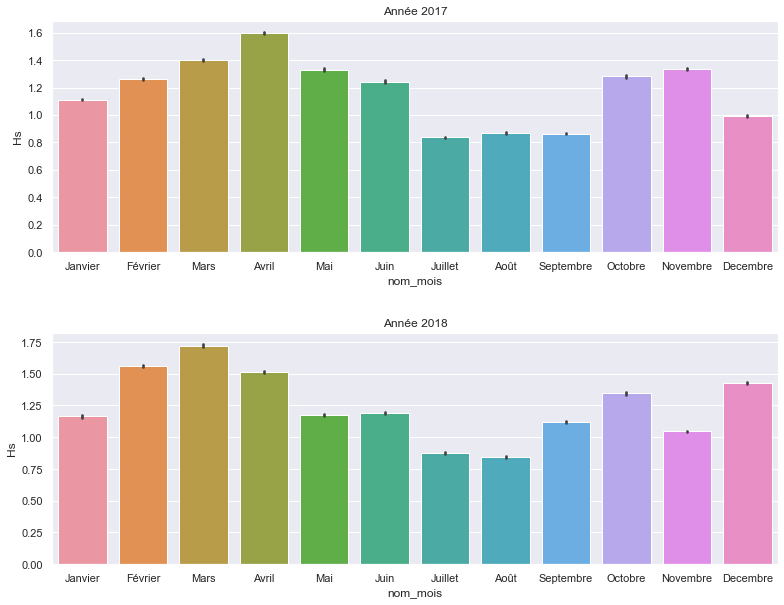

In [ ]:

df1 = df[df["Date/Time"].dt.year != 2018] # ne prend en compte que l'année 2017
df2 = df[df["Date/Time"].dt.year != 2017] # ne prend en compte que l'année 2018

plt.figure(1,figsize=(13,10))
plt.gcf().subplots_adjust( hspace = 0.35)

plt.subplot(2,1,1)
sns.barplot(
    df1['nom_mois'], 
    df1['Hs'],
    ci=50
)
plt.title('Année 2017')

plt.subplot(2,1,2)
sns.barplot(
    df2['nom_mois'], 
    df2['Hs'],
    ci=50
)
plt.title('Année 2018')

In [ ]:

pd.crosstab(df['Hmax_indic'], df['nom_mois'])

nom_mois,Août,Avril,Decembre,Février,Janvier,Juillet,Juin,Mai,Mars,Novembre,Octobre,Septembre
Hmax_indic,,,,,,,,,,,,
0-Très petite,1836,191,748,443,1194,1905,834,766,314,596,1000,1254
1-Petite,997,1238,1520,1161,1104,907,1306,1333,1288,1670,1098,1327
2-Moyenne,130,1215,686,951,618,159,683,825,1011,597,546,287
3-Grosse,7,230,17,129,56,2,56,48,355,4,302,7
4-Très Grosse,0,0,0,1,0,0,0,0,3,0,21,0


Affichage des correlations entre variables continues de votre table de données :

<AxesSubplot:>

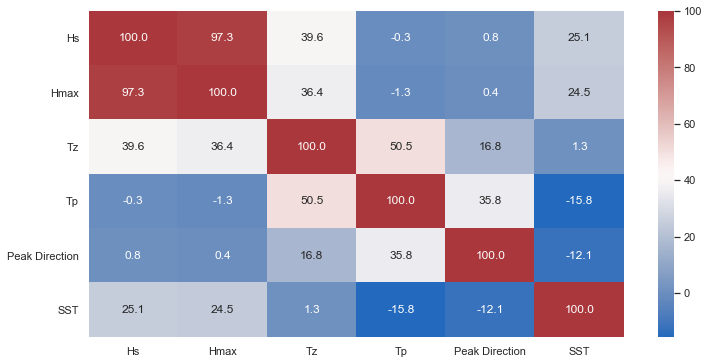

In [ ]:
sns.heatmap(100*df.corr(), annot = True, cmap= sns.cm.vlag, fmt='.1f')

Commentaire des résultats (croisements et corrélations) :

Ecrivez votre réponse ci-dessous
<br/><font color=blue> La taille des vagues varie selon les mois de l'année. C'est en Mars/Avril que les vagues sont en moyenne les plus grosses (=1.6 mètres). Parfait pour les amateurs. 
    
<br/><font color=blue> Mais c'est en Octobre que les vagues atteignent des tailles monstrueuses (> 6mètres). C'est à ce mois qu'elles sont intéressantes pour les professionnels et férus de sensations fortes.

<br/><font color=blue> Il y a une forte corrélation entre la hauteur record et la hauteur significative (97.3%), ce qui semble logique car d'après notre courbe de régression ci-dessous, la hauteur maximale augmente avec la hauteur significative.

## Graphiques

C:\Users\maxim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hs', ylabel='Hmax'>

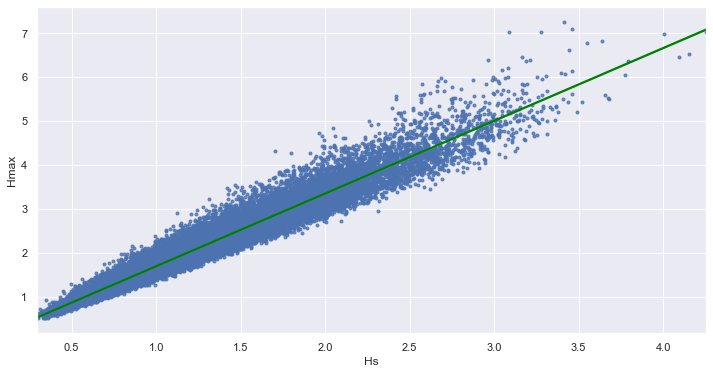

In [ ]:

sns.regplot(df['Hs'], df['Hmax'],marker='.',color="b",line_kws={"color": "green"})  

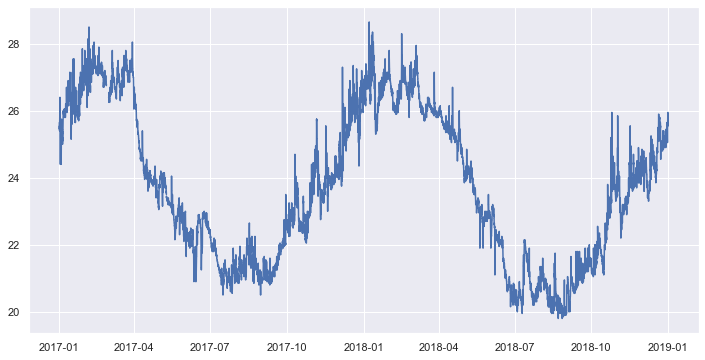

In [ ]:

plt.plot(df["Date/Time"],df["SST"])

Analysez le croisement de 2 colonnes au sein de votre table en utilisant un graphique :

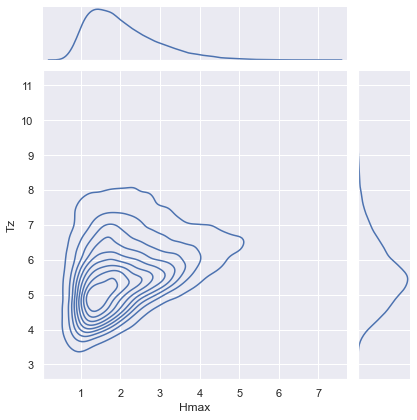

In [ ]:

sns.jointplot(
    x=df['Hmax'], 
    y=df['Tz'], 
    kind="kde"
)

Commentaire des 3 graphiques

<br/><font color=blue>Nous remarquons un pique de température vers Mars/début Avril. Les conditions sont pareto-optimales à cette période: Température de l'eau agréable et vagues au rendez-vous.
    
<br/><font color=blue>D'après le dernier graphique: plus les vagues sont hautes, plus la borne inférieure de leur période est élevée, ce qui est bon signe: on a plus de chance d'avoir le temps de remonter à la surface avant qu'une autre déferle sur nous. 

---